In [54]:
import pandas as pd
import seaborn as sns
import warnings

In [55]:
warnings.filterwarnings('ignore')

In [56]:
internet_time=pd.read_csv('numberofinternetusers new.csv')
internet_time.head(3)

,Entity,Code,Year,Number of Internet users
0,Afghanistan,AFG,1990,0
1,Albania,ALB,1990,0
2,Algeria,DZA,1990,0


In [4]:
# 년도 별 인터넷 사용자 계산 및 그래픽 출력

In [57]:
total_users_by_years=internet_time.groupby(by=['Year'])['Number of Internet users'].sum()

<Axes: xlabel='Year', ylabel='Number of Internet users'>

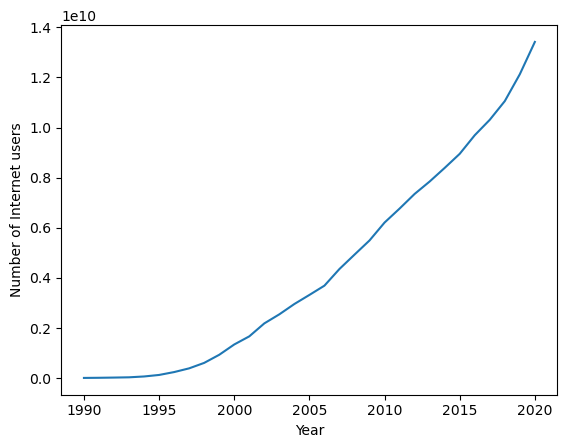

In [11]:
sns.lineplot(
    data=total_users_by_years, 
)

In [58]:
internet_time.pivot(index='Entity', columns='Year', values='Number of Internet users')

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.462458e+06,1.661808e+06,1.860932e+06,2.290135e+06,2.788039e+06,3.809983e+06,4.811862e+06,6.163380e+06,6.647431e+06,7.170891e+06
Albania,0.0,0.0,0.0,0.0,0.0,367.0,1053.0,1581.0,2102.0,2613.0,...,1.363310e+06,1.428742e+06,1.495476e+06,1.566066e+06,1.640132e+06,1.717114e+06,1.796721e+06,1.881570e+06,1.970058e+06,2.071012e+06
Algeria,0.0,0.0,0.0,0.0,101.0,504.0,504.0,3027.0,6056.0,60548.0,...,5.444989e+06,6.781424e+06,8.550141e+06,1.143425e+07,1.510548e+07,1.732394e+07,1.961845e+07,2.056036e+07,2.472641e+07,2.733110e+07
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,980.0,1974.0,4490.0,5015.0,...,5.717500e+04,5.874600e+04,6.024900e+04,6.168500e+04,6.308200e+04,6.508900e+04,6.762500e+04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,101.0,3029.0,10087.0,100722.0,...,3.098403e+07,3.286289e+07,3.475308e+07,3.740656e+07,4.148613e+07,4.935706e+07,5.467081e+07,6.629569e+07,6.576181e+07,6.794402e+07
World,2617438.0,4280727.0,6885825.0,9978025.0,20372971.0,39137572.0,77094037.0,120463190.0,187786430.0,280906271.0,...,2.218882e+09,2.426855e+09,2.598608e+09,2.793664e+09,3.004583e+09,3.256216e+09,3.483746e+09,3.795522e+09,4.194082e+09,4.699886e+09
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,103.0,2571.0,4107.0,10258.0,...,3.797139e+06,4.575064e+06,5.396802e+06,6.258371e+06,6.868328e+06,7.195320e+06,8.024694e+06,NaN,NaN,NaN


In [20]:
mask=internet_time[internet_time['Year']==1990]['Number of Internet users'].sort_values().tail(10).values

In [24]:
mask2=internet_time[internet_time['Year']==1990]['Number of Internet users'].isin(mask)
internet_time[internet_time['Year']==1990][mask2]

,Entity,Code,Year,Number of Internet users
11,Australia,AUS,1990,99747
35,Canada,CAN,1990,99842
65,Europe,0,1990,399647
74,Germany,DEU,1990,99921
86,High-income countries,0,1990,2586707
136,Netherlands,NLD,1990,49973
183,Sweden,SWE,1990,49939
200,United Kingdom,GBR,1990,49976
201,United States,USA,1990,1946784
208,World,OWID_WRL,1990,2617438


In [28]:
mask=internet_time['Code'].str.len()!=3

In [30]:
trash=internet_time[mask]

In [31]:
trash['Entity'].unique()

array(['Asia', 'Europe', 'High-income countries', 'World', 'Kosovo'],
      dtype=object)

In [32]:
# now we can drop the rows where they aren't countries

In [59]:
internet_time=internet_time[internet_time['Code'].str.len()==3]
internet_time

,Entity,Code,Year,Number of Internet users
0,Afghanistan,AFG,1990,0
1,Albania,ALB,1990,0
2,Algeria,DZA,1990,0
3,American Samoa,ASM,1990,0
4,Andorra,AND,1990,0
...,...,...,...,...
6186,Uruguay,URY,2020,2952444
6187,Uzbekistan,UZB,2020,23837456
6188,Vietnam,VNM,2020,67944025
6190,Zambia,ZMB,2020,3747688


In [60]:
internet_time=internet_time.pivot(index='Entity', columns='Year', values='Number of Internet users')

In [39]:
internet_time

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1462458.0,1661808.0,1860932.0,2290135.0,2788039.0,3809983.0,4811862.0,6163380.0,6647431.0,7170891.0
Albania,0.0,0.0,0.0,0.0,0.0,367.0,1053.0,1581.0,2102.0,2613.0,...,1363310.0,1428742.0,1495476.0,1566066.0,1640132.0,1717114.0,1796721.0,1881570.0,1970058.0,2071012.0
Algeria,0.0,0.0,0.0,0.0,101.0,504.0,504.0,3027.0,6056.0,60548.0,...,5444989.0,6781424.0,8550141.0,11434250.0,15105483.0,17323937.0,19618454.0,20560362.0,24726411.0,27331100.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,980.0,1974.0,4490.0,5015.0,...,57175.0,58746.0,60249.0,61685.0,63082.0,65089.0,67625.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,2501.0,8805.0,12008.0,27018.0,56038.0,90067.0,325291.0,680620.0,...,11702475.0,14455269.0,16381075.0,17210158.0,17707239.0,18444878.0,18827072.0,NaN,NaN,NaN
Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,101.0,3029.0,10087.0,100722.0,...,30984031.0,32862888.0,34753078.0,37406557.0,41486130.0,49357060.0,54670814.0,66295694.0,65761807.0,67944025.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,103.0,2571.0,4107.0,10258.0,...,3797139.0,4575064.0,5396802.0,6258371.0,6868328.0,7195320.0,8024694.0,NaN,NaN,NaN


<Axes: xlabel='Year', ylabel='Entity'>

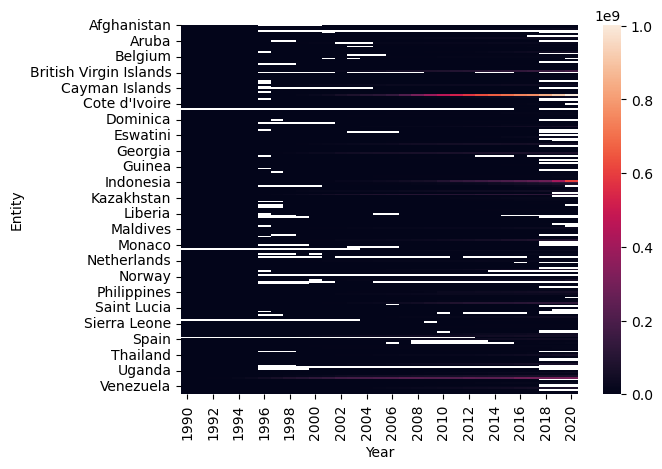

In [40]:
sns.heatmap(
    data=internet_time
)

In [62]:
internet_time.dropna(how='any', inplace=True)

<Axes: xlabel='Year', ylabel='Entity'>

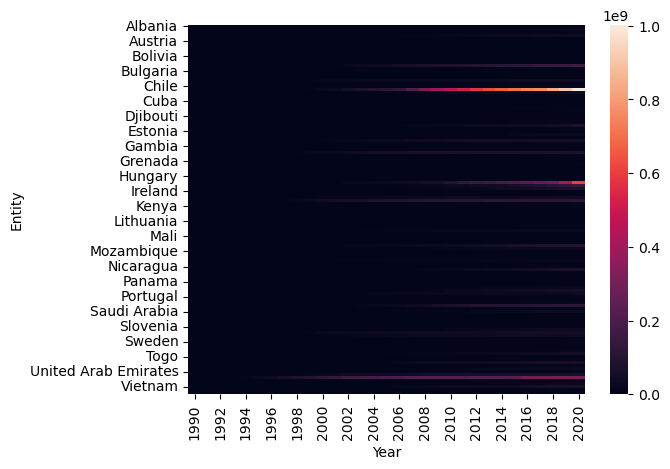

In [44]:
sns.heatmap(
    data=internet_time
)

In [64]:
internet_time_1990_1999=internet_time.iloc[0:,0:10]
internet_time_2000_2009=internet_time.iloc[0:,10:20]
internet_time_2010_2020=internet_time.iloc[0:,20:]

internet_time_1990_1999

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Entity,,,,,,,,,,
Albania,0.0,0.0,0.0,0.0,0.0,367.0,1053.0,1581.0,2102.0,2613.0
Algeria,0.0,0.0,0.0,0.0,101.0,504.0,504.0,3027.0,6056.0,60548.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,112.0,844.0,2836.0,11421.0
Argentina,0.0,0.0,1005.0,10047.0,15074.0,30150.0,50237.0,100406.0,301013.0,1203862.0
Armenia,0.0,0.0,0.0,0.0,308.0,1753.0,3120.0,3653.0,4169.0,31122.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.0,0.0,0.0,0.0,1993.0,9950.0,59611.0,109139.0,227965.0,327003.0
Uzbekistan,0.0,0.0,0.0,0.0,0.0,352.0,1006.0,2516.0,5034.0,7550.0
Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,101.0,3029.0,10087.0,100722.0


<Axes: xlabel='Year', ylabel='Entity'>

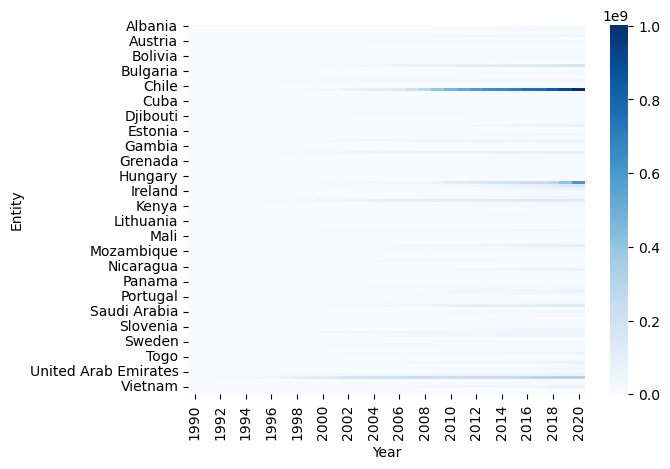

In [72]:
sns.heatmap(data=internet_time, cmap='Blues')

<Axes: xlabel='Year', ylabel='Entity'>

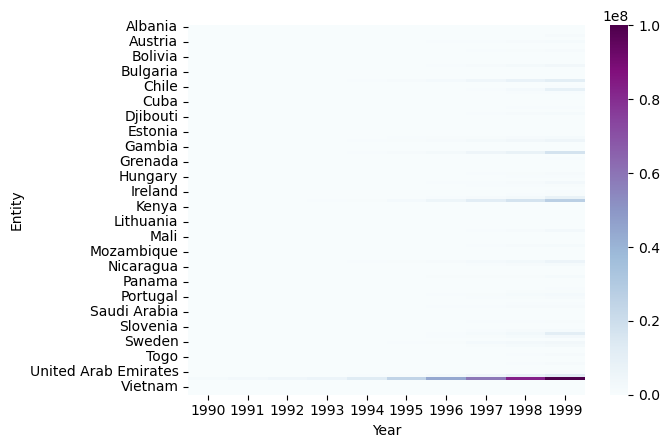

In [71]:
sns.heatmap(internet_time_1990_1999, cmap='BuPu')

<Axes: xlabel='Year', ylabel='Entity'>

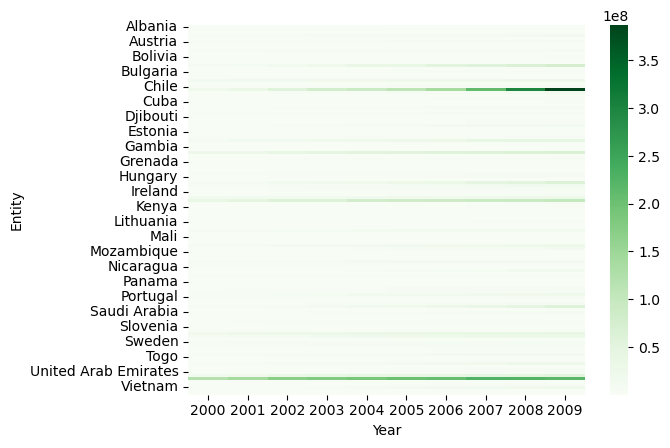

In [70]:
sns.heatmap(internet_time_2000_2009, cmap='Greens')

<Axes: xlabel='Year', ylabel='Entity'>

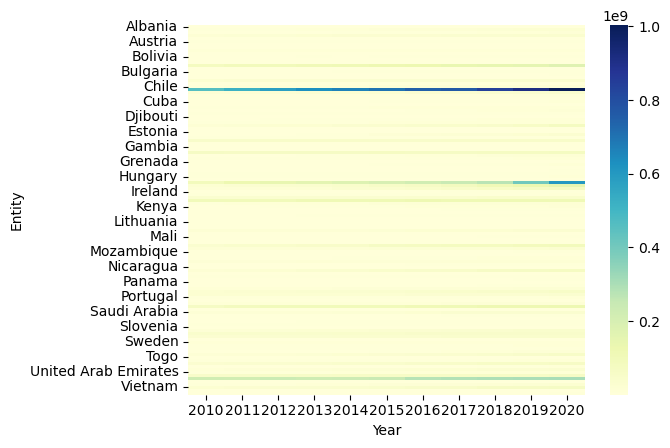

In [69]:
sns.heatmap(internet_time_2010_2020,cmap="YlGnBu")